# Part II - Factors That Influences Cost of Borrowing
## by Ibrahim SHITTU




## Investigation Overview


> In this investigation, I wanted to look at the features of loans that could be used to predict their borrower cost(APR). The variables of interests were the Borrower Rate, loan amount, borrower's Prosper rating, loan term, and borrower's employment status


## Dataset Overview

> The dataset consisted of borrower APRs and attributes of 113,937 loans. The attributes included Borrower Rate, loan amount, borrower's Prosper rating, loan term, and borrower's employment status as well as many others which relates to borrower's basic information and loan performance. Data points with missing APR and ProsperScore information were removed from the analysis to keep datatable consistent.

In [6]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [7]:
# load in the dataset into a pandas dataframe
loan = pd.read_csv('prosperLoanData.csv')

In [8]:
# selecting column of interest by Subseting the loan dataframe 
int_cols = ['LoanOriginalAmount', 'BorrowerAPR', 'BorrowerRate', 'StatedMonthlyIncome', 'Term', 
            'ProsperRating (numeric)', 'ProsperRating (Alpha)', 'ProsperScore', 'Occupation', 'EmploymentStatus']
loan_df = loan[int_cols]

In [9]:
# Convert ProsperRating and Employment status into ordered categorical types
props_rating = ['AA', 'A', 'B', 'C', 'D', 'E','HR']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = props_rating)

loan_df['ProsperRating'] = loan_df['ProsperRating (Alpha)'].astype(ordered_var)

In [10]:
# filter out loans without BorrowerAPR and ProsperScores
loan_df = loan_df[loan_df['BorrowerAPR'].isnull()==False]
loan_df = loan_df[loan_df['ProsperScore'].isnull()==False]

## Distribution of BorrowerAPR

> BorrowerAPR takes a multimordial distribution shape with lowest value at 5% and exceptional peak of about 36%. 

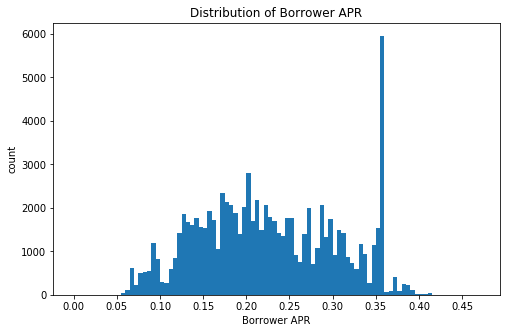

In [11]:
bins = np.arange(0, loan_df.BorrowerAPR.max()+0.05, 0.005)
plt.figure(figsize=[8, 5])
plt.hist(data = loan_df, x = 'BorrowerAPR', bins = bins)
plt.title('Distribution of Borrower APR')
plt.xlabel('Borrower APR')
plt.ylabel('count');
plt.xticks(np.arange(0, loan_df['BorrowerAPR'].max()+0.05, 0.05));

## BorrowerApr relationship BrorrowerRate and ProsperRaating

> BorrowerApr shows a positive relationship with BrorrowerRate implying higher rate translates to higher cost. while BorrowerApr decreases with improved ProsperRating showing a strong effect (negative relationship) on borrowing cost. This may serve as incentive to customers with good ratings score to keep borrowing since the pay less cost compare to other borrowers.

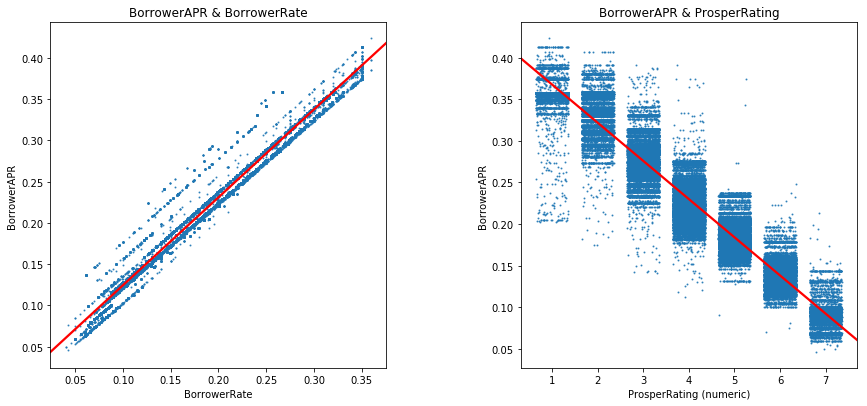

In [12]:
#Plot of features with strong correlation
plt.figure(figsize=[14, 6])

# Borrower APR vs BorrowerRate
plt.subplot(1,2,1)
sb.regplot(x="BorrowerRate", y="BorrowerAPR", data=loan_df, 
           scatter_kws= {'s' :1}, line_kws={'color': 'red'});
plt.title('BorrowerAPR & BorrowerRate');

# Borrower APR vs ProsperRating
plt.subplot(1,2,2)

sb.regplot(x="ProsperRating (numeric)", y="BorrowerAPR", data=loan_df, x_jitter=0.35, 
           scatter_kws= {'s':1}, line_kws={'color': 'red'});
plt.title('BorrowerAPR & ProsperRating');

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

## BorrowerAPR, LoanAmount, and BorrowerRate  

> We can see that Borrowers with higher loan amount generally associated with lower APR. Whereas, BorrowerAPR and BorrowerRate are positively correlated as ealier stated i.e the higher the rate, the higher the Apr. 

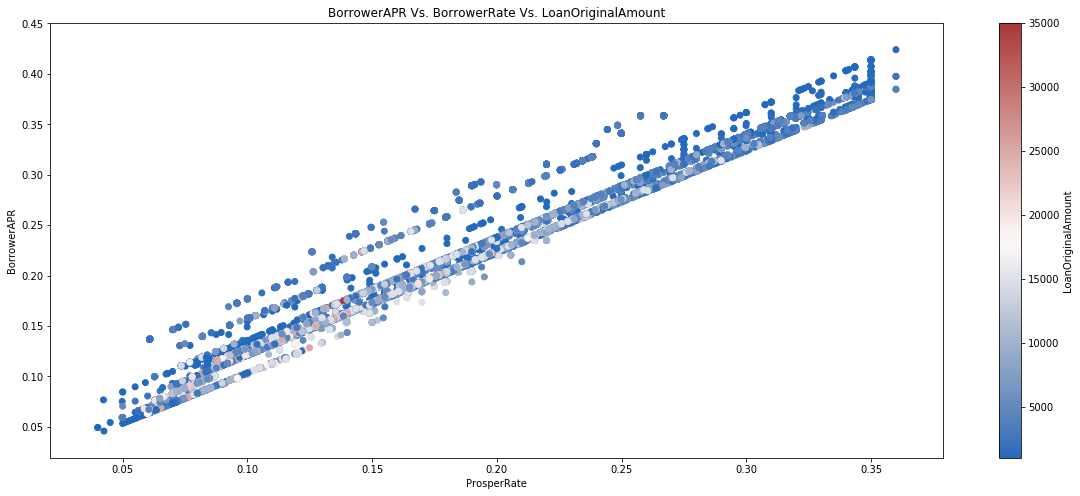

In [8]:
plt.figure(figsize = [20, 8]) 

plt.scatter(data=loan_df, x='BorrowerRate',y='BorrowerAPR',c='LoanOriginalAmount', cmap='vlag')
plt.colorbar(label = 'LoanOriginalAmount')
plt.title('BorrowerAPR Vs. BorrowerRate Vs. LoanOriginalAmount')
plt.xlabel('ProsperRate')
plt.ylabel('BorrowerAPR');

## LoanAmount and Employment Status by Term  

> Higher Loan values are granted to majorly Employed borrowers and their repayment period is flexible between 12-60months. Whereas unemployed, retired and part-time worker borrowers majorly repay between 36-60 despite taking lesser loan amount

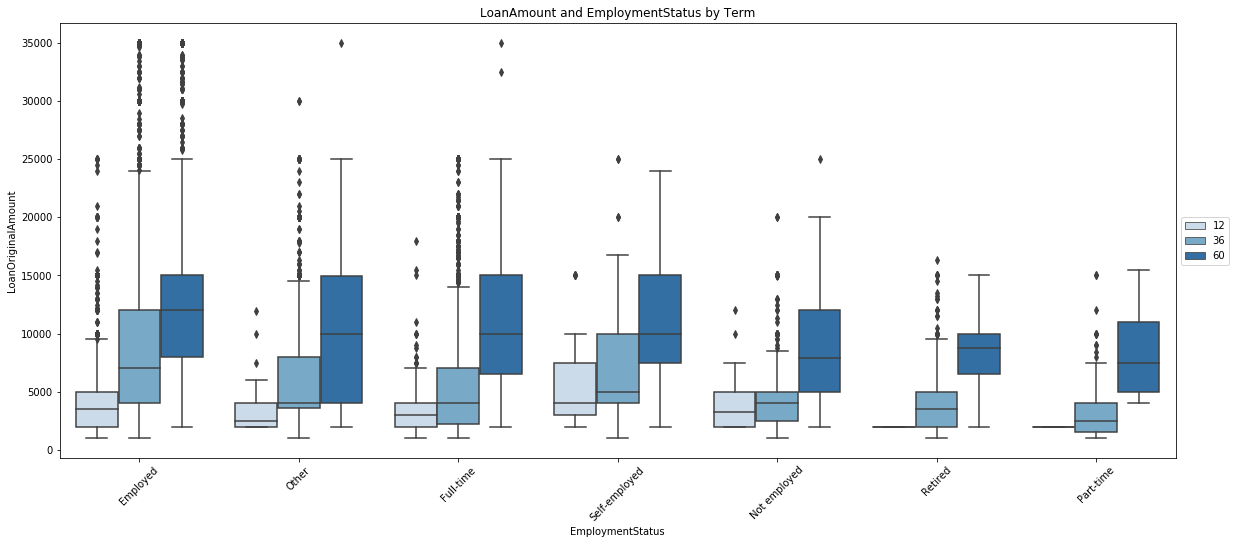

In [11]:
fig = plt.figure(figsize = [20,8])
sb.boxplot(data=loan_df,x='EmploymentStatus',y='LoanOriginalAmount',hue='Term', palette = 'Blues', dodge=0.3,)
plt.title('LoanAmount and EmploymentStatus by Term')
plt.xticks(rotation=45)
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5));


###                                                                        Thank You!


In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve  --no-input --no-prompt